In [33]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np 
tips = sns.load_dataset('tips')
df = tips
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [34]:
 #I'll convert the sex to numbers
df['sex'].replace(['Male','Female'],[0,1],inplace=True)
print(df)

     total_bill   tip  sex smoker   day    time  size
0         16.99  1.01    1     No   Sun  Dinner     2
1         10.34  1.66    0     No   Sun  Dinner     3
2         21.01  3.50    0     No   Sun  Dinner     3
3         23.68  3.31    0     No   Sun  Dinner     2
4         24.59  3.61    1     No   Sun  Dinner     4
..          ...   ...  ...    ...   ...     ...   ...
239       29.03  5.92    0     No   Sat  Dinner     3
240       27.18  2.00    1    Yes   Sat  Dinner     2
241       22.67  2.00    0    Yes   Sat  Dinner     2
242       17.82  1.75    0     No   Sat  Dinner     2
243       18.78  3.00    1     No  Thur  Dinner     2

[244 rows x 7 columns]


In [35]:
df = df[['total_bill','sex','tip','smoker','size',]]
df

,total_bill,sex,tip,smoker,size
0,16.99,1,1.01,No,2
1,10.34,0,1.66,No,3
2,21.01,0,3.50,No,3
3,23.68,0,3.31,No,2
4,24.59,1,3.61,No,4
...,...,...,...,...,...
239,29.03,0,5.92,No,3
240,27.18,1,2.00,Yes,2
241,22.67,0,2.00,Yes,2
242,17.82,0,1.75,No,2


In [36]:
# now I'll drop missing values (note that I'm doing this after going to my smaller collection of variables, 
#since there's no point in dropping values from variables I'm not going to use anyway)
df = df.dropna()

In [37]:
# vectorize the categorical variables (as a new dataframe, I want to keep the original one)
df_vect = pd.get_dummies(df)
df

,total_bill,sex,tip,smoker,size
0,16.99,1,1.01,No,2
1,10.34,0,1.66,No,3
2,21.01,0,3.50,No,3
3,23.68,0,3.31,No,2
4,24.59,1,3.61,No,4
...,...,...,...,...,...
239,29.03,0,5.92,No,3
240,27.18,1,2.00,Yes,2
241,22.67,0,2.00,Yes,2
242,17.82,0,1.75,No,2


In [38]:
# compute a matrix of correlations between all the columns (including the target)
cormat = df_vect.corr()
# extract from this matrix the (absolute value of) the correlation between each feature and the target (`sex')
print(np.abs(cormat['sex']).sort_values(ascending=False))


sex           1.000000
total_bill    0.144877
tip           0.088862
size          0.086195
smoker_Yes    0.002816
smoker_No     0.002816
Name: sex, dtype: float64


In [47]:
# now I'll create the usual feature matrix and target variable (here I chose 'sex' as the target variable) 
# NOTE: random forest should be able to handle categorical variables, but the sklearn developers haven't incorporated this and have resisted doing so for years, for some reason, so let's just use our vectorized data
X = df_vect.drop('sex', axis=1)
y = df_vect['sex']
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train)
print(y_train)


     total_bill   tip  size  smoker_Yes  smoker_No
236       12.60  1.00     2           1          0
169       10.63  2.00     2           1          0
78        22.76  3.00     2           0          1
47        32.40  6.00     4           0          1
194       16.58  4.00     2           1          0
..          ...   ...   ...         ...        ...
137       14.15  2.00     2           0          1
72        26.86  3.14     2           1          0
140       17.47  3.50     2           0          1
235       10.07  1.25     2           0          1
37        16.93  3.07     3           0          1

[183 rows x 5 columns]
236    0
169    1
78     0
47     0
194    0
      ..
137    1
72     1
140    1
235    0
37     1
Name: sex, Length: 183, dtype: int64


In [48]:
# fit a random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)
# I'll compute the accuracy, just to get a sense of how it's doing
from sklearn.metrics import accuracy_score
y_model = model.predict(X_test)
print(accuracy_score(y_test, y_model))

0.6065573770491803


In [49]:
# now let's look at the built-in feature importances for our random forest (first I'll print the column names to remember what they are)
print(X.columns)
print(model.feature_importances_)

Index(['total_bill', 'tip', 'size', 'smoker_Yes', 'smoker_No'], dtype='object')
[0.49871931 0.38004791 0.08465562 0.01710685 0.0194703 ]


Feature: 0, Score: 0.49872
Feature: 1, Score: 0.38005
Feature: 2, Score: 0.08466
Feature: 3, Score: 0.01711
Feature: 4, Score: 0.01947


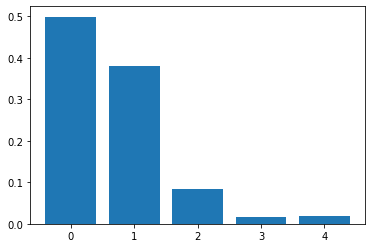

In [50]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [51]:
# next we compute the permutation feature importance
from sklearn.inspection import permutation_importance 
permimp = permutation_importance(model, X_test, y_test, n_repeats=10)
print(permimp.importances_mean)

[0.03934426 0.04590164 0.00491803 0.03114754 0.06065574]


In [52]:
# now make the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_model))


[[30  7]
 [17  7]]


In [53]:
# get a full classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        37
           1       0.50      0.29      0.37        24

    accuracy                           0.61        61
   macro avg       0.57      0.55      0.54        61
weighted avg       0.58      0.61      0.58        61



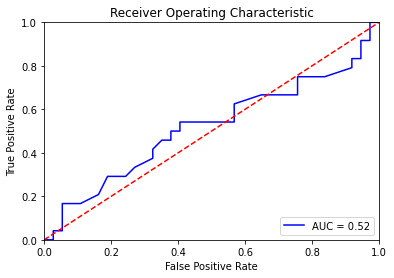

In [54]:
# now do the ROC curve plot
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
